<div style="text-align: center;font: bold"><h3 >Model Building and Evaluation<h3></div>

# Split data into training and testing sets

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


data = pd.read_csv("sales_data.csv")


data['Units_Sold'] = data['Units_Sold'].fillna(data['Units_Sold'].mean())
data['Revenue'] = data['Revenue'].fillna(data['Revenue'].mean())
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')

data_prophet = data[['Date', 'Revenue']].rename(columns={'Date': 'ds', 'Revenue': 'y'})

print(data_prophet.tail())
print("="*25)

# split data with respect to year
train_data = data_prophet[data_prophet['ds'].dt.year == 2022]
test_data = data_prophet[data_prophet['ds'].dt.year == 2023]


print(train_data.head())
print("="*25)
print(test_data.head())


            ds        y
265 2023-03-29  2909.16
621 2023-03-29   631.05
81  2023-03-29  3090.50
295 2023-03-29  4079.94
747 2023-03-30  1628.87
            ds        y
564 2022-01-01  2862.96
505 2022-01-01  2541.73
43  2022-01-02  4920.20
721 2022-01-03  4259.79
530 2022-01-03  1296.68
            ds        y
602 2023-01-02  3953.51
904 2023-01-05  3897.99
359 2023-01-05  4412.61
778 2023-01-05  2514.42
386 2023-01-06  1001.88


# Initialize Prophet model

In [41]:
from prophet import Prophet
model = Prophet()
model.fit(train_data)

17:20:38 - cmdstanpy - INFO - Chain [1] start processing
17:20:38 - cmdstanpy - INFO - Chain [1] done processing


# Make predictions

In [42]:
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

# Evaluate the model

In [43]:

actual = test_data['y'].values
predicted = forecast['yhat'][-len(test_data):].values

mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)
rmse = sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 1593076.1344422782
Mean Absolute Error (MAE): 1071.8229969625797
Root Mean Squared Error (RMSE): 1262.1711985472803


# Visualize predictions

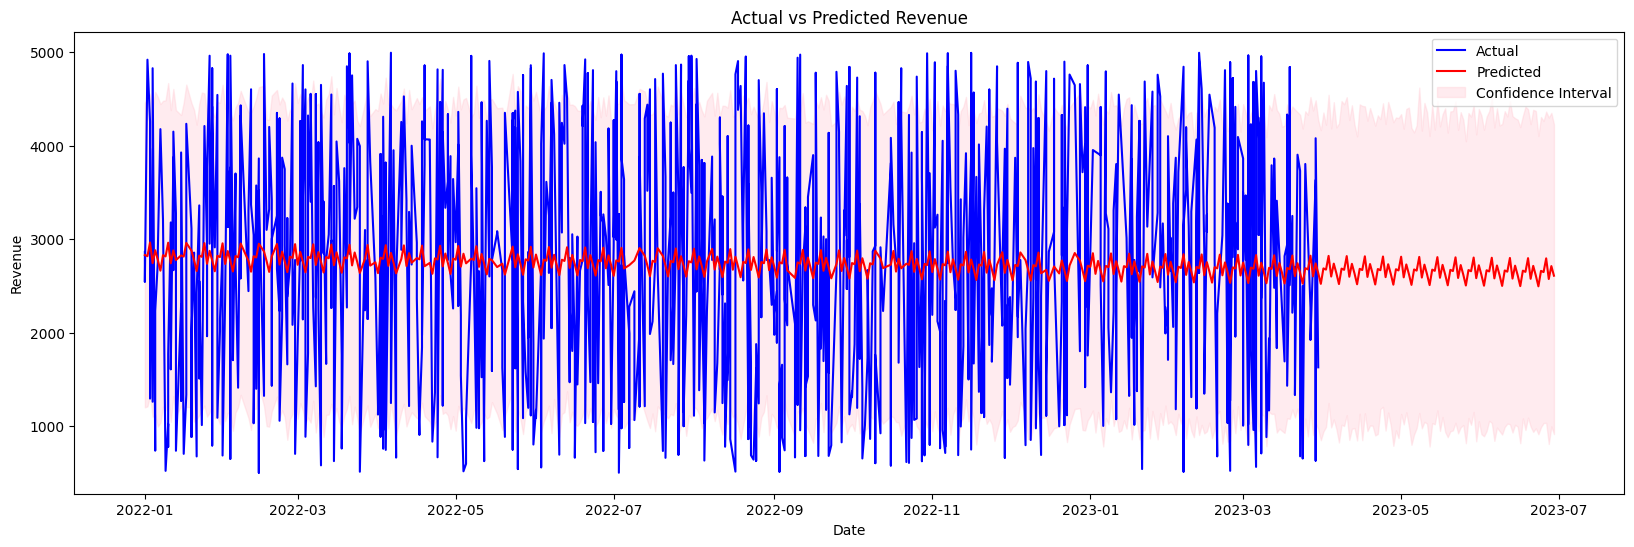

In [44]:
plt.figure(figsize=(20,6))
plt.plot(data_prophet['ds'], data_prophet['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

# Save predictions

In [45]:
forecast.to_csv('sales_forecast.csv', index=False)